In [12]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
from stocker import Stocker
import warnings 
warnings.filterwarnings('ignore')

#super easy to load stock data using Stocker
chipotle = Stocker("CMG")


CMG Stocker Initialized. Data covers 2006-01-26 to 2018-02-21.


        Date   Open   High    Low  Close      Volume  Ex-Dividend  \
0 2006-01-26  45.00  48.28  39.51  44.00  13218600.0          0.0   
1 2006-01-27  44.88  44.90  41.75  42.20   1150800.0          0.0   
2 2006-01-30  42.20  45.51  41.25  44.80    735800.0          0.0   
3 2006-01-31  45.50  49.30  45.38  47.52   1111200.0          0.0   
4 2006-02-01  48.90  49.24  45.25  46.56    606700.0          0.0   

   Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  \
0          1.0      45.00      48.28     39.51       44.00   13218600.0   
1          1.0      44.88      44.90     41.75       42.20    1150800.0   
2          1.0      42.20      45.51     41.25       44.80     735800.0   
3          1.0      45.50      49.30     45.38       47.52    1111200.0   
4          1.0      48.90      49.24     45.25       46.56     606700.0   

          ds      y  Daily Change  
0 2006-01-26  44.00         -1.00  
1 2006-01-27  42.20         -2.68  
2 2006-01-30  44.80       

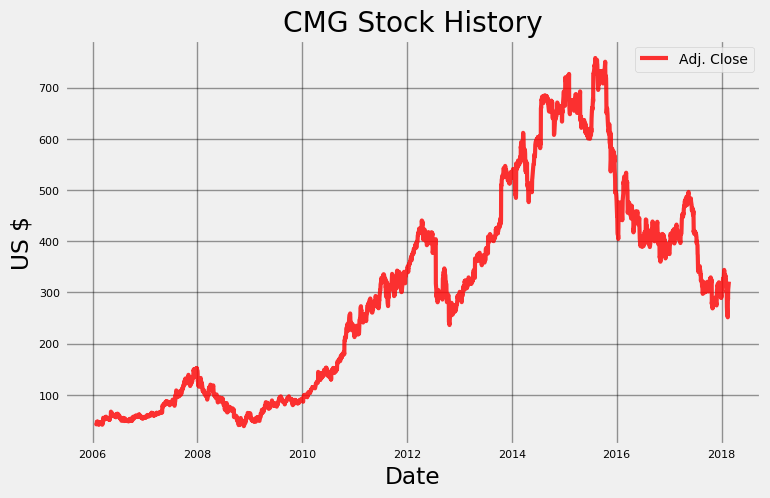

In [2]:
#getting stock history using stock attribute of stocker

chipotle_history = chipotle.stock
print(chipotle_history.head())

#plotting all time
chipotle.plot_stock()

# Chipotle had a meteoric rise as the country realized that affordable and delicious fresh food was worth buying often. 

Maximum Adj. Close = 757.77 on 2015-08-05.
Minimum Adj. Close = 479.85 on 2015-12-31.
Current Adj. Close = 320.96 on 2018-02-21.



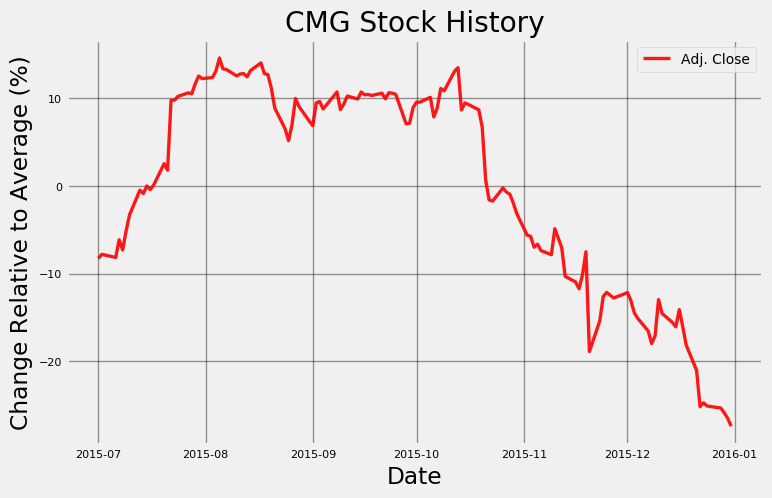

In [3]:
#plotting 2015 when Chipotle saw massive drops due to food scares
chipotle.plot_stock(start_date='2015-07-01', end_date = '2015-12-31', stats =['Adj. Close'], plot_type='pct')

## Chipotle's food scares started in July, with a major scare shortly after in August. The stock didn't drop precipitously and fought resistance for nearly the entire months of August and September. Look [here](http://www.foodsafetynews.com/2015/12/a-timeline-of-chipotles-five-outbreaks/#.Wo7lqBPwbRY) for a full timeline of the food scares at the end of 2015.

# Let's look at the final three months of the year to learn more about the crash. 



Maximum Adj. Close = 750.42 on 2015-10-13.
Minimum Adj. Close = 479.85 on 2015-12-31.
Current Adj. Close = 320.96 on 2018-02-21.



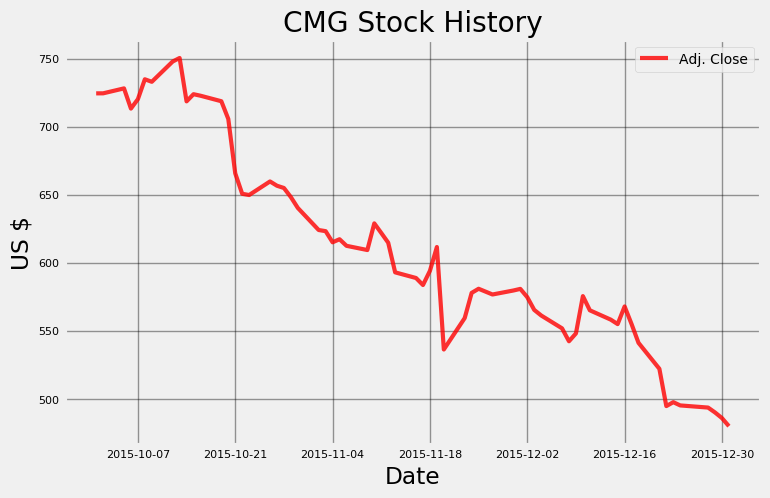

Maximum Adj. Close = 750.42 on 2015-10-13.
Minimum Adj. Close = 479.85 on 2015-12-31.
Current Adj. Close = 320.96 on 2018-02-21.



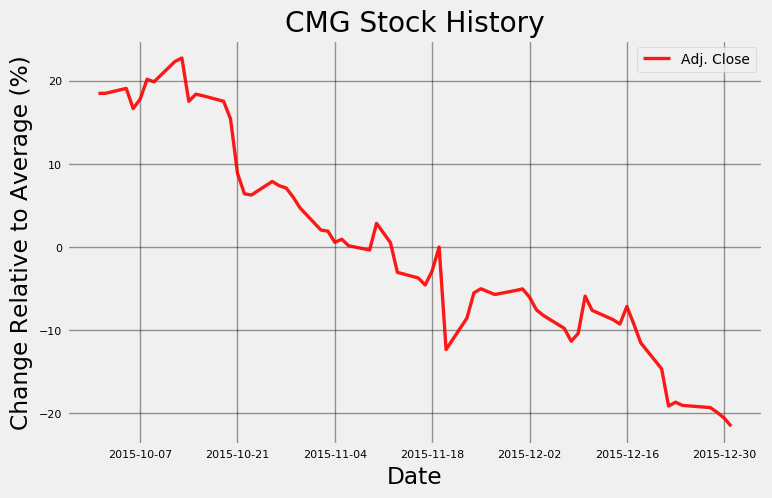

In [23]:
chipotle.plot_stock(start_date='2015-10-01', end_date = '2015-12-31', stats =['Adj. Close'])
chipotle.plot_stock(start_date='2015-10-01', end_date = '2015-12-31', stats =['Adj. Close'], plot_type='pct')

# We can see that Chipotle fell 36% from the second week of October to New Year's Eve. Ouch. 

# Let's look at only the last month's data before we build a prophet model to predict future price. 

Maximum Adj. Close = 333.97 on 2018-01-25.
Minimum Adj. Close = 251.33 on 2018-02-13.
Current Adj. Close = 320.96 on 2018-02-21.



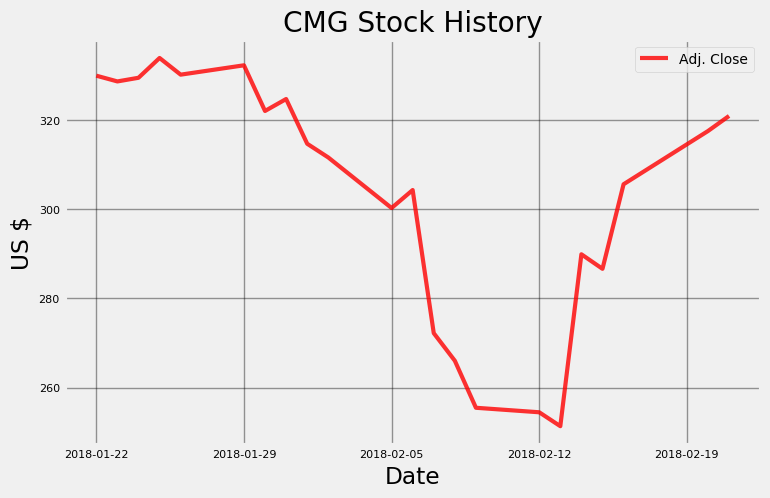

In [4]:
chipotle.plot_stock(start_date='2018-01-21', end_date = '2018-02-21', stats =['Adj. Close'])


# It's easy to see the dip starting at the end of January and the pop that came around Feb. 13 when former Taco Bell CEO Brian Niccol replaced Steve Ells as Chief Executive of Chipotle, Inc.

# Now let's use Prophet to see how past predictions have fared. 

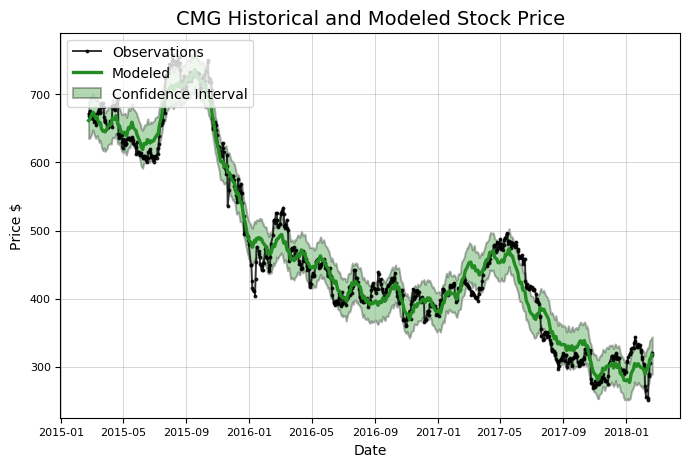

In [5]:
#creating prophet model
model, model_data = chipotle.create_prophet_model()

# Let's look at when exactly the major changepoints were.


Changepoints sorted by slope rate of change (2nd derivative):

          Date  Adj. Close     delta
145 2015-09-18      729.48 -3.917665
72  2015-06-05      613.80  3.846805
121 2015-08-14      748.34 -1.888129
217 2015-12-31      479.85  1.735918
314 2016-05-20      449.92  1.047678


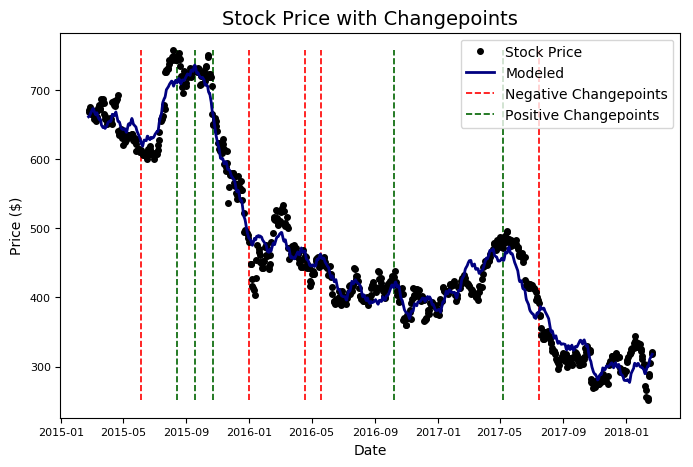

In [9]:
chipotle.changepoint_date_analysis()

# Now we'll add a search term over the same graph to see how search traffic was related to the stock price. The first positive changepoint (positive second derivative means negative change) on 09-18-2015 seems to almost directly respond to the first outbreak in Minnesota on 09-11-2015. This changepoint also has the largest delta and the stock hasn't recovered since.  


 Top Related Queries: 

              query  value
0     chipotle menu    100
1  chipotle near me     86
2    chipotle hours     45
3   chipotle recipe     36
4  chipotle chicken     35

 Rising Related Queries: 

                     query  value
0          e coli chipotle  75050
1           chipotle ecoli  17600
2       chipotle chiptopia  11550
3    chipotle closing 2016  10050
4  chipotle friend or faux   9450


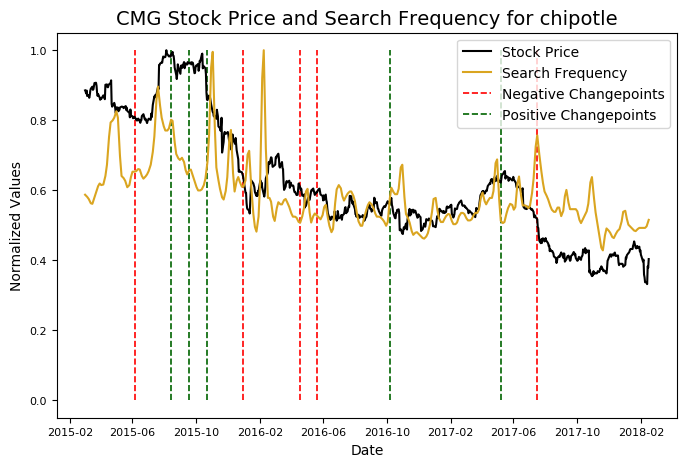

In [13]:
chipotle.changepoint_date_analysis(search = 'chipotle')

# We can see a major spike in search traffic that overlaps and continues past the middle of September, 2015 when the first outbreak happened. Let's make the search more specific so we can see the relationship between the food contamination scare and the stock price. From the list given we can see that the first two rising queries are 'e coli chipotle' and 'chipotle e coli'. We'll use the first because the search volume is so much higher. 



 Top Related Queries: 

                      query  value
0  e coli outbreak chipotle    100
1         chipotle outbreak     97
2           e coli outbreak     93
3        e coli in chipotle     64
4           e coli symptoms     50

 Rising Related Queries: 

                      query   value
0  e coli outbreak chipotle  896100
1         chipotle outbreak  865000
2           e coli outbreak  834750
3           e coli symptoms  444450
4      chipotle e coli 2015  391000


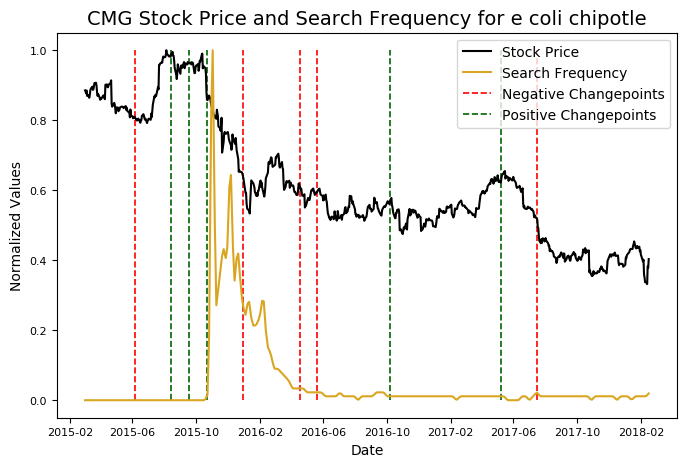

In [15]:
chipotle.changepoint_date_analysis(search = 'e coli chipotle')

# Now it's easy to see the spike in traffic related to the e coli outbreak that immedietely preceded and continued into the price crash. Once again, the first outbreak in Minnesota was on September 11, 2015. The stock crashed on September 18, 2015, and we can see the search traffic as the news spread.

# Enough with the past, let's predict the future. 

Predicted Price on 2018-05-22 = $339.53


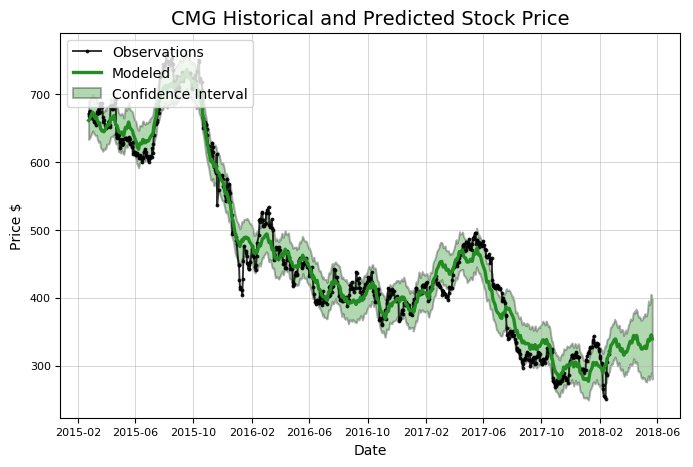

In [16]:
#Predicting 90 days into the future with Prophet model 

model, future = chipotle.create_prophet_model(90)

# Current Adj. Close = 320.96 on 2018-02-21, so the Prophet is bullish on Chipotle at the end of the next 90 days. Let's make one more model and double the time we want to forecast out. 

Predicted Price on 2018-08-20 = $229.94


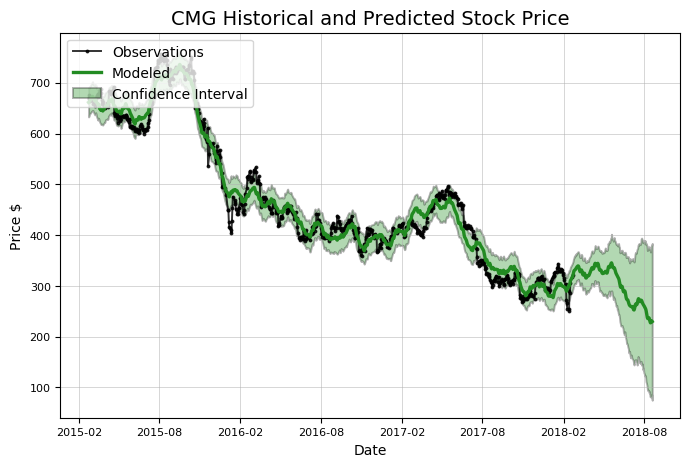

In [17]:
model, future = chipotle.create_prophet_model(180)

# As we can see, the model is not as bullish over the longer haul, which makes sense given the history of the stock. The recent uptick could be seen as optimism for the new CEO, which obviously this model does not include when predicting future prices. 

# In the end, Chipotle has had a rough go of it for a couple of years. This model gives short term bullish results and long term bearish results for CMG. As stated before, however, the changes in upper management are likely to have effects that won't be felt in this model for a while. 

# Personally, I couldn't live without Chipotle and my consumption of their products hasn't changed at all during their troubles. However, the e coli outbreak is a very specific event that caused the price crash, which does make this stock harder to predict while they're still recovering. Either way, I had a blast on this project learning about my favorite food provider and I hope you did too. Thanks for reading!!

# - Tyler 